# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann, 2017-2020, O. Kaufmann et Q. Campeol - 2022-2023  
## Séance 1

***
## 1. Premiers pas avec Python et R : Chargement et manipulation d'un <i>dataframe</i>

In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

<b>Note:</b><br>    Il est possible d'utiliser dans un même notebook des cellules en <code>python</code> et d'autre en <code>R</code> grâce au package rpy2<br>
    Les cellules <code>R</code> doivent débuter par %%R


<div class="alert alert-block alert-info">
<b>Info:</b><br>         Documentation externe : <br><br>
        <a href="https://cran.r-project.org/index.html">site officiel de <code>R</code></a>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     En <code>python</code>, nous utiliserons très souvent des objets du package **pandas**<br>
    Documentation externe : <br>
    <a href="https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas">introduction à pandas</a>
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.1 Imports</b>
</div>

In [2]:
%load_ext rpy2.ipython
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import bisect
import rpy2

- Vérification de la version de <code>R</code>

In [3]:
%%R
version[['version.string']]

[1] "R version 4.5.1 (2025-06-13)"


<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.2 Premiers pas avec Python</b>
</div>

- Charger le fichier de données `data1.txt` et mettre les données dans la variable <i>my_df</i>

<div class="alert alert-block alert-warning">
<b>Question 1.2.1: </b><br>Quel est le format du fichier <i>data1.txt</i> ?
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Ouvrir le fichier avec un editeur de texte (gedit par exemple) et l'examiner
</div>

<b>Note:</b><br>    Utilisez **?** ou **help** pour obtenir de l'aide sur les fonctions <code>python</code> (et <code>R</code>)


In [4]:
? pd.read_csv

Signature:
 pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: 

In [5]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

- Chargez le fichier `data1.txt` et mettez son contenu dans un DataFrame pandas nommé *my\_df*

In [ ]:
# Résultat attendu ci-dessous...

Nom   x  y   t
0   A   0  0   4
1   B   1  0   8
2   C   4  2   7
3   D   2  7  11
4   E   3  2   5
5   F  11  8  14

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.3 Manipuler le DataFrame dans Python</b>
</div>

- **Affichez** la colonne *x* de *my\_df* sous forme d'un DataFrame puis d'une Série

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Préférez la fonction <b>display</b> à la fonction <b>print</b> pour afficher un DataFrame ou une Série dans un notebook
</div>

In [ ]:
# Résultat attendu ci-dessous...

x
0   0
1   1
2   4
3   2
4   3
5  11

0     0
1     1
2     4
3     2
4     3
5    11
Name: x, dtype: int64

- Définissez la colonne _Nom_ comme identifiant (index) des lignes 

In [ ]:
# Résultat attendu ci-dessous...

x  y   t
Nom           
A     0  0   4
B     1  0   8
C     4  2   7
D     2  7  11
E     3  2   5
F    11  8  14

- Affichez les informations des lignes _B_ et _D_ à l'aide des méthodes <b>loc</b> et <b>iloc</b> de la classe Dataframe

In [ ]:
# Résultat attendu ci-dessous...

x  y   t
Nom          
B    1  0   8
D    2  7  11

x  y   t
Nom          
B    1  0   8
D    2  7  11

- Affichez les informations des colonnes _x_ et _y_

In [ ]:
# Résultat attendu ci-dessous...

x  y
Nom       
A     0  0
B     1  0
C     4  2
D     2  7
E     3  2
F    11  8

- Affichez les informations des colonnes _x_ et _t_ pour les lignes _D_, _E_ et _F_

In [ ]:
# Résultat attendu ci-dessous...

x   t
Nom        
D     2  11
E     3   5
F    11  14

-  Filtrez *my\_df* pour ne retenir que les lignes où *x* est inférieur à 6 et *t* est supérieur ou égal à 5

In [ ]:
# Résultat attendu ci-dessous...

x  y   t
Nom          
B    1  0   8
C    4  2   7
D    2  7  11
E    3  2   5

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.4 Ajout de nouvelles données (lignes et colonnes)</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Il est en général préférable de charger des jeux de données complets plutôt que d'ajouter une à une des informations
</div>

<div class="alert alert-block alert-warning">
<b>Question 1.4.1: </b><br>Assurez-vous que le nom de la colonne des index ne soit pas perdu.
</div>

- Ajoutez les quatres nouvelles lignes suivantes:  

Nom | x   | y   | t 
--- | --- | --- | ---
P | 16 | 6 | 8
Q | 22 | 12 | 14
R | 17 |  NA | 11
S | 15 | 2 | 9

In [ ]:
# Résultat attendu ci-dessous...

x     y   t
Nom              
A     0   0.0   4
B     1   0.0   8
C     4   2.0   7
D     2   7.0  11
E     3   2.0   5
F    11   8.0  14
P    16   6.0   8
Q    22  12.0  14
R    17   NaN  11
S    15   2.0   9

- Calculer les valeurs d'une nouvelle colonne basée sur la différence entre la colonne t et la colonne y, stockez le résultat dans une colonne nommée z.

In [ ]:
# Résultat attendu ci-dessous...

x     y   t    z
Nom                   
A     0   0.0   4  4.0
B     1   0.0   8  8.0
C     4   2.0   7  5.0
D     2   7.0  11  4.0
E     3   2.0   5  3.0
F    11   8.0  14  6.0
P    16   6.0   8  2.0
Q    22  12.0  14  2.0
R    17   NaN  11  NaN
S    15   2.0   9  7.0

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.5 Enregistrer les données modifiées dans un nouveau fichier</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 1.5.1: </b><br>Nommez ce fichier <i>data2.txt</i>, choisissez un format identique à celui de <i>data1.txt</i>
</div>

In [ ]:
# Résultat attendu ci-dessous...

- Vérifiez le format du fichier `data2.txt`

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.6 Recharger un objet sauvegardé</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 1.6.1: </b><br>Supprimez <b>my\_df</b> du <b>workspace</b> 
</div>

-  Chargez *my\_df* depuis le fichier `data2.txt`

In [ ]:
# Résultat attendu ci-dessous...

-  Affichez à nouveau *my\_df*

In [ ]:
# Résultat attendu ci-dessous...

x     y   t    z
Nom                   
A     0   0.0   4  4.0
B     1   0.0   8  8.0
C     4   2.0   7  5.0
D     2   7.0  11  4.0
E     3   2.0   5  3.0
F    11   8.0  14  6.0
P    16   6.0   8  2.0
Q    22  12.0  14  2.0
R    17   NaN  11  NaN
S    15   2.0   9  7.0

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>1.7 Premiers pas avec R</b>
</div>

- Passez le DataFrame pandas *my\_df* dans une cellule <code>R</code> et affichez-le

<div class="alert alert-block alert-info">
<b>Info:</b><br>     utiliser <code>%%R -i x -o y</code> pour passer la variable x à <code>R</code> (-i : input) et récupérer <br>
    la variable y (-o: output) dans <code>python</code> 
</div>

In [ ]:
# Résultat attendu ci-dessous...

   x   y  t   z
A  0   0  4   4
B  1   0  8   8
C  4   2  7   5
D  2   7 11   4
E  3   2  5   3
F 11   8 14   6
P 16   6  8   2
Q 22  12 14   2
R 17 NaN 11 NaN
S 15   2  9   7


- Affichez l'histogramme de *t* **dans <code>R</code>**

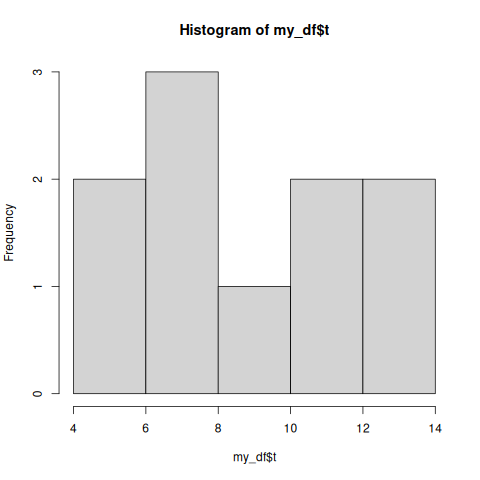

In [ ]:
# Résultat attendu ci-dessous...

- Affichez l'histogramme de *t* **dans <code>python</code>** avec pandas

<Axes: >

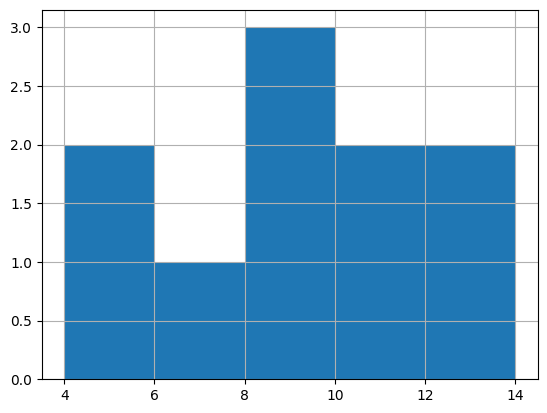

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question 1.7.1: </b><br>Comment expliquez-vous la différence ? 
</div>

- Quel est le **type** de *my\_df* ?

In [ ]:
# Résultat attendu ci-dessous...

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.series.Series

pandas.core.series.Series

- Et pour le DataFrame passé dans <code>R</code> ?

In [ ]:
# Résultat attendu ci-dessous...

[1] "list"       "data.frame"
[1] "numeric" "numeric"
[1] "list"       "data.frame"
[1] "numeric" "numeric"


- Quels sont les **types des colonnes** du DataFrame pandas *my\_df* ?

In [ ]:
# Résultat attendu ci-dessous...

x      int64
y    float64
t      int64
z    float64
dtype: object

* Et celui des colonnes du DataFrame dans <code>R</code>?

In [ ]:
# Résultat attendu ci-dessous...

$x
[1] "integer"

$y
[1] "numeric"

$t
[1] "integer"

$z
[1] "numeric"



***
## 2. Exploration du jeu de données réel <b>coal.dat</b> et calcul du variogramme expérimental

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>2.1 Chargez le jeu de données</b>
</div>

- Chargez le **fichier 'coal.dat'** dans un dataframe en utilisant les noms suivants pour les colonnes  
'x', 'y', 'elevation', 'thickness', 'cal_value', 'ash%', 'sulphur%'

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le fichier est encodé avec un jeu de caractère propre à windows: le système d'encodage 'windows-1252'
</div>

In [26]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6466203d2070642e726561645f6373762827636f616c2e646174272c20656e636f64696e673d2777696e646f77732d31323532272c20736b6970726f77733d342c206e616d65733d5b2778272c202779272c2027656c65766174696f6e272c2027746869636b6e657373272c202763616c5f76616c7565272c202761736825272c202773756c7068757225275d293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-info">
<b>Info:</b><br>     <i>x</i> et <i>y</i> sont les coordonnées spatiales des échantillons de charbon et <i>thickness</i> est l'épaisseur de la couche de charbon. <i>cal_value</i> représente la valeur calorifique, <i>ash%</i> le pourcentage en cendres et <i>sulphur%</i> le pourcentage en soufre
</div>

In [ ]:
# Résultat attendu ci-dessous...

x      y  elevation  thickness  cal_value   ash%  sulphur%
0   9500  12600      605.9       1.84      22.26  19.29      0.83
1   9650  12600      605.1       1.73      21.36  19.97      0.78
2   9950  12600      601.5       1.65      22.34  19.09      1.03
3  10100  12600      601.5       2.22      22.19  21.96      1.11
4  10250  12600      601.3       2.54      22.43  18.55      1.03

<div class="alert alert-block alert-warning">
<b>Question 2.1.1: </b><br>Combien y a-t-il d'échantillons dans le jeu de données ? 
</div>

* Affichez un **histogramme de l'épaisseur** de la couche. Entrainez-vous à afficher cet histogramme avec 6, 8, 10, 12, 14, 16, 32 et 64 classes

<Axes: >

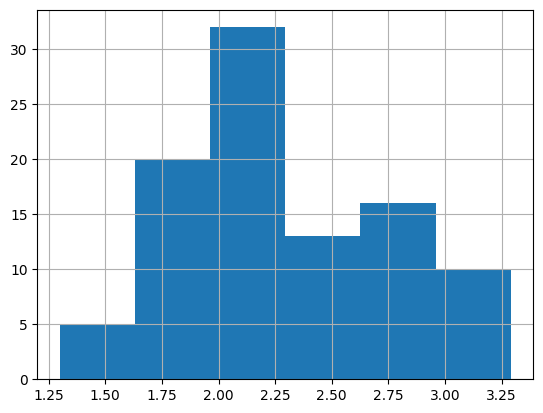

In [ ]:
# Résultat attendu ci-dessous...

- Affichez un **boxplot** de la variable *thickness*

<Axes: >

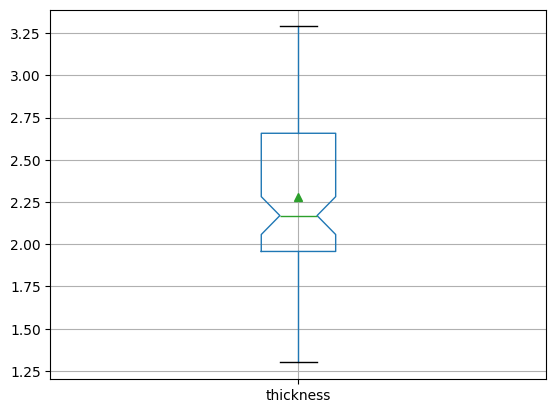

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question 2.1.2: </b><br>Qu'observez-vous? Estimez la moyenne et l'écart-type des épaisseurs de la couche aux points d'échantillonnage.
</div>

* Calculez la **moyenne et l'écart-type de l'épaisseur** dans l'échantillon

In [ ]:
# Résultat attendu ci-dessous...

Mean: 2.281, std: 0.463


<div class="alert alert-block alert-info">
<b>Info:</b><br>     <b>Tip:</b>  utiliser la méthode <code>describe</code>
</div>

In [ ]:
# Résultat attendu ci-dessous...

x             y   elevation  thickness  cal_value  \
count     96.000000     96.000000   96.000000  96.000000  96.000000   
mean   10242.187500  13345.312500  604.218750   2.281250  24.623854   
std      476.021236    470.054763    4.084562   0.462645   2.458261   
min     9500.000000  12600.000000  597.000000   1.300000  19.920000   
25%     9800.000000  12900.000000  600.875000   1.957500  22.770000   
50%    10250.000000  13350.000000  604.050000   2.170000  24.565000   
75%    10700.000000  13800.000000  606.900000   2.657500  26.155000   
max    11000.000000  14100.000000  615.500000   3.290000  30.460000   

            ash%   sulphur%  
count  96.000000  96.000000  
mean   16.940833   1.049271  
std     2.951436   0.158202  
min    10.910000   0.710000  
25%    14.772500   0.945000  
50%    17.235000   1.040000  
75%    18.997500   1.142500  
max    23.020000   1.400000

<div class="alert alert-block alert-warning">
<b>Question 2.1.3: </b><br>Comment interprétez-vous le résultat?
</div>

* Affichez des **boxplots** pour les variables 'thickness', 'cal_value', 'ash%', 'sulphur%'

In [ ]:
# Résultat attendu ci-dessous...

<Axes: >

* Affichez la matrice des variances - covariances

In [ ]:
# Résultat attendu ci-dessous...

x              y    elevation   thickness   cal_value  \
x          226596.217105   11568.256579  -893.851974   69.530921  758.777796   
y           11568.256579  220951.480263  1342.351974 -104.536184  329.686678   
elevation    -893.851974    1342.351974    16.683645   -1.280297   -3.041484   
thickness      69.530921    -104.536184    -1.280297    0.214041    0.162780   
cal_value     758.777796     329.686678    -3.041484    0.162780    6.043047   
ash%         -910.288158    -339.785526     3.851500   -0.221899   -6.886557   
sulphur%       27.641612      10.307072    -0.101313    0.001364    0.225794   

                 ash%   sulphur%  
x         -910.288158  27.641612  
y         -339.785526  10.307072  
elevation    3.851500  -0.101313  
thickness   -0.221899   0.001364  
cal_value   -6.886557   0.225794  
ash%         8.710972  -0.223357  
sulphur%    -0.223357   0.025028

* Affichez la matrice des corrélations

In [ ]:
# Résultat attendu ci-dessous...

x         y  elevation  thickness  cal_value      ash%  \
x          1.000000  0.051700  -0.459720   0.315721   0.648426 -0.647917   
y          0.051700  1.000000   0.699153  -0.480696   0.285315 -0.244919   
elevation -0.459720  0.699153   1.000000  -0.677513  -0.302909  0.319485   
thickness  0.315721 -0.480696  -0.677513   1.000000   0.143128 -0.162508   
cal_value  0.648426  0.285315  -0.302909   0.143128   1.000000 -0.949163   
ash%      -0.647917 -0.244919   0.319485  -0.162508  -0.949163  1.000000   
sulphur%   0.367050  0.138604  -0.156785   0.018637   0.580595 -0.478360   

           sulphur%  
x          0.367050  
y          0.138604  
elevation -0.156785  
thickness  0.018637  
cal_value  0.580595  
ash%      -0.478360  
sulphur%   1.000000

<div class="alert alert-block alert-warning">
<b>Question 2.1.4: </b><br>Parmi les couples de variables suivants, quels sont ceux où les deux <b>variables sont fortement corrélées</b>? <br>
        1- (ash%, thickness) <br>
        2- (ash%, sulphur%) <br>
        3- (ash%, cal_value)
</div>

* Affichez la **corrélation** entre la teneur en cendres (ash%) et la teneur en soufre (sulphur%)

In [ ]:
# Résultat attendu ci-dessous...

ash%
sulphur% -0.47836

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>2.2 Représenter les points de mesures dans un graphique avec <code>matplotlib</code></b>
</div>

- Tracez les graphes suivant :  
    1- ash% en fonction de thickness  
    2- ash% en fonction de sulphur%  
    3- ash% en fonction de cal_value  

In [ ]:
# Résultat attendu ci-dessous...

thickness
ash%  -0.162508

sulphur%
ash%  -0.47836

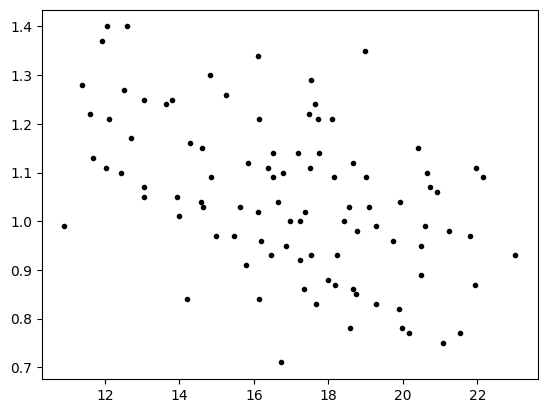

In [ ]:
# Résultat attendu ci-dessous...

cal_value
ash%  -0.949163

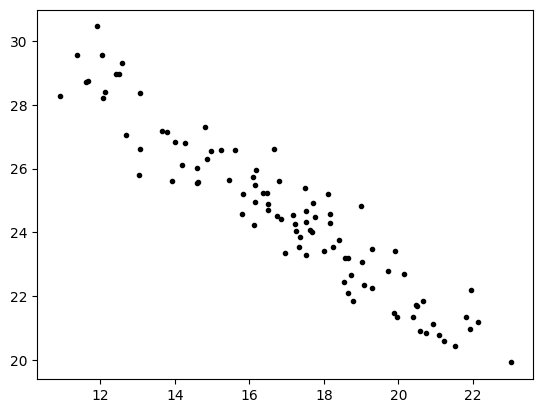

In [ ]:
# Résultat attendu ci-dessous...

- Affichez une **carte** montrant la position des points d'échantillonnage à l'aide de matplotlib

In [ ]:
# Résultat attendu ci-dessous...

(np.float64(9425.0),
 np.float64(11075.0),
 np.float64(12525.0),
 np.float64(14175.0))

* Affichez, à l'aide de **geopandas**, une **carte** montrant la position des points d'échantillonnage avec une **représentation en couleurs** correspondant à l'**épaisseur de la couche**

<Axes: >

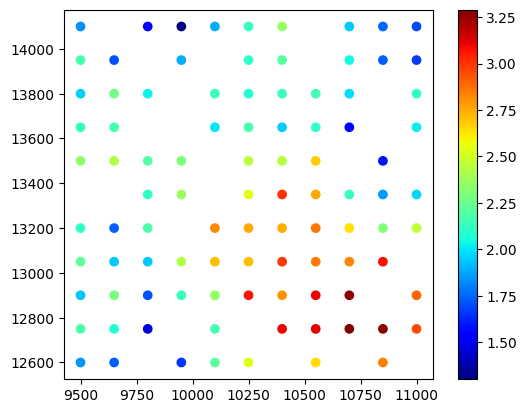

In [ ]:
# Résultat attendu ci-dessous...

***
## 3. Calculer le variogramme expérimental de l'épaisseur

<div class="alert alert-block alert-success">
	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>	<b>3.1 Ecrivez une fonction pour calculer le variogramme expérimental</b>
</div>

- Ecrivez une fonction pour calculer le variogramme expérimental de l'épaisseur (en négligeant l'altitude dans le calcul de la distance)

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <b> Tip :</b>  le package bisect contient des fonctions qui facilitent l'implémentation</div>
</div>

In [42]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e64656620766172696f5f6578706572696d656e74616c286764662c207265762c20646973745f636c6173736573293a3c62723e0a2020202022222220436f6d7075746174696f6e206f6620746865206578706572696d656e74616c20766172696f6772616d3c62723e0a202020203c62723e0a20202020506172616d65746572733c62723e0a202020202d2d2d2d2d2d2d2d2d2d3c62723e0a202020206764663a2067656f70616e6461732e47656f446174614672616d653c62723e0a2020202020202020412067656f646174616672616d652077686572652073616d706c696e6720706f696e7473206172652073746f7265643c62723e0a202020207265763a207374723c62723e0a2020202020202020546865206e616d65206f66207468652052655620696e207468652047656f446174614672616d653c62723e0a20202020646973745f636c61737365733a206c6973743c62723e0a2020202020202020546865206c697374206f6620746865206c6f77657220626f756e647320666f72207468652064697374616e636520696e74657276616c733c62723e0a20202020202020203c62723e0a2020202052657475726e733c62723e0a202020202d2d2d2d2d2d2d3c62723e0a202020206e756d70792e61727261793c62723e0a20202020202020206578706572696d656e74616c20766172696f6772616d20666f7220656163682064697374616e636520696e74657276616c3c62723e0a202020202222223c62723e0a202020203c62723e0a20202020696478203d206764662e696e6465783c62723e0a202020204e203d206c656e28696478293c62723e0a2020202048203d206c656e28646973745f636c6173736573293c62723e0a202020206e68203d206e702e7a65726f732828482c3129293c62723e0a202020204468203d206e702e7a65726f732828482c3129293c62723e0a202020206768203d206e702e7a65726f732828482c3129293c62723e0a20202020666f72206920696e2072616e6765284e2d31293a3c62723e0a2020202020202020666f72206a20696e2072616e676528692b312c204e293a3c62723e0a202020202020202020202020706f696e745f69203d206764662e6c6f635b6964785b695d2c202767656f6d65747279275d3c62723e0a202020202020202020202020706f696e745f6a203d206764662e6c6f635b6964785b6a5d2c202767656f6d65747279275d3c62723e0a20202020202020202020202064696a203d20706f696e745f692e64697374616e636528706f696e745f6a293c62723e0a20202020202020202020202068203d206269736563742e6269736563745f6c65667428646973745f636c61737365732c2064696a293c62723e0a20202020202020202020202069662068203c20483a3c62723e0a202020202020202020202020202020206e685b685d202b3d20313c62723e0a2020202020202020202020202020202044685b685d202b3d20286764662e6c6f635b6964785b695d2c207265765d2d6764662e6c6f635b6964785b6a5d2c207265765d292a2a323c62723e0a2020202072657475726e2044682f6e6820202020202020203c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- Calculez le variogramme experimental par classes de 75m de large

In [43]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e646973745f636c6173736573203d205b6920666f72206920696e2072616e676528302c203830302c203735295d3c62723e0a6768203d20766172696f5f6578706572696d656e74616c286764662c2027746869636b6e657373272c20646973745f636c6173736573293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


* Affichez le variogramme expérimental

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_69900/3744136965.py:5: SyntaxWarning: invalid escape sequence '\g'
  ax.set_ylabel('$\gamma^*(h)$ [m²]')


(0.0, 0.5)

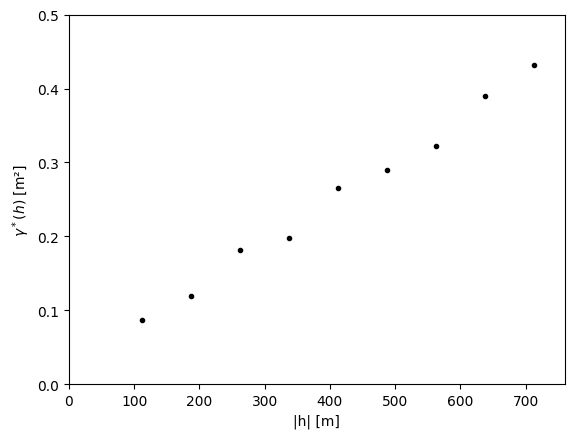

In [ ]:
# Résultat attendu ci-dessous...

In [ ]:

%%display_prompt --title Question 3.1.1: --prompt 5175656c206d6f64c3a86c6520766172696f6772617068697175652070726f706f73657a2d766f7573203f0a0a --answer 202020203c62723e0a20202020556e20766172696f6772616d6d65206c696ec3a9616972652e
# @info: Exécutez-moi pour afficher la question

Question 3.1.1: Quel modèle variographique proposez-vous ?

***
<div class="alert alert-block alert-danger" align="center">
    <b>FIN DE LA PREMIERE SEANCE</b>
</div>